## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

## Enrico Martim Zúcollo - NUSP: 14568048

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sneeze5.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805
...,...,...,...,...,...,...
845,30,0,1,1,33.0,72.282306
846,4,1,1,0,29.0,31.734540
847,50,0,1,0,29.0,134.725193
848,29,0,0,0,41.0,75.382218


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


## **1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


### Primeiro importamos as bibliotecas que serão utilizadas no notebook todo  


In [3]:
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Antes de fazermos a análise pedida, vemos as informações gerais do dataset    

In [4]:
# Vemos os primeiros dados do dataset para entender com o que estaremos mexendo 
display(df.head())
# Vemos o tipo de cada variável do dataset e o volume de dados
print(df.info())
# Vemos a descrição estatística do dataset, sendo que temos informações de média, desvio padrão, mínimo, máximo e quartis para cada variável
display(df.describe())

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,1,0,23.0,41.889975
1,17,1,0,1,26.0,46.703039
2,56,0,0,0,18.0,57.574885
3,35,0,0,1,19.0,42.053782
4,23,0,0,0,18.0,55.208805


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   850 non-null    int64  
 1   alcohol   850 non-null    int64  
 2   antihist  850 non-null    int64  
 3   smoker    850 non-null    int64  
 4   age       850 non-null    float64
 5   pollen    850 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 40.0 KB
None


,nsneeze,alcohol,antihist,smoker,age,pollen
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,45.225882,0.408235,0.270588,0.188235,31.258824,59.425317
std,145.954955,0.491796,0.444525,0.391130,11.661553,31.022778
min,0.000000,0.000000,0.000000,0.000000,18.000000,6.876659
25%,9.000000,0.000000,0.000000,0.000000,19.000000,36.913786
50%,18.000000,0.000000,0.000000,0.000000,30.000000,54.628146
75%,37.000000,1.000000,1.000000,0.000000,39.000000,76.149298
max,3179.000000,1.000000,1.000000,1.000000,80.000000,210.301477


### Começamos a análise exploratória fazendo a média e a variância que, por mais que tenham sido calculados pelo describe acima (variância é calculada indiretamente do desvio padrão), usamos essas métricas para calcular o índice de dispersão. 

In [5]:
media_y = df['nsneeze'].mean()
variancia_y = df['nsneeze'].var()
print(f"Média de espirros: {media_y:.2f}")
print(f"Variância de espirros: {variancia_y:.2f}")
print(f"Razão Variância/Média (Índice de Dispersão): {variancia_y / media_y:.2f}")

Média de espirros: 45.23
Variância de espirros: 21302.85
Razão Variância/Média (Índice de Dispersão): 471.03


### Como podemos ver, temos uma variância muito maior que a média e, portanto, um índice de dispersão muito maior que 1, o que nos indica uma possível superdispersão dos dados.

### Como segunda análise, veremos a distribuição dos dados em relação a cada feature. Como existem alguns outliers e o boxplot estava totalmente comprimido, decidi utilizar showfliers=False no boxplot para remover eles do nosso boxplot, a fim de uma melhor visualização. Também decidi separar a análise em variáveis categóricas e numéricas.

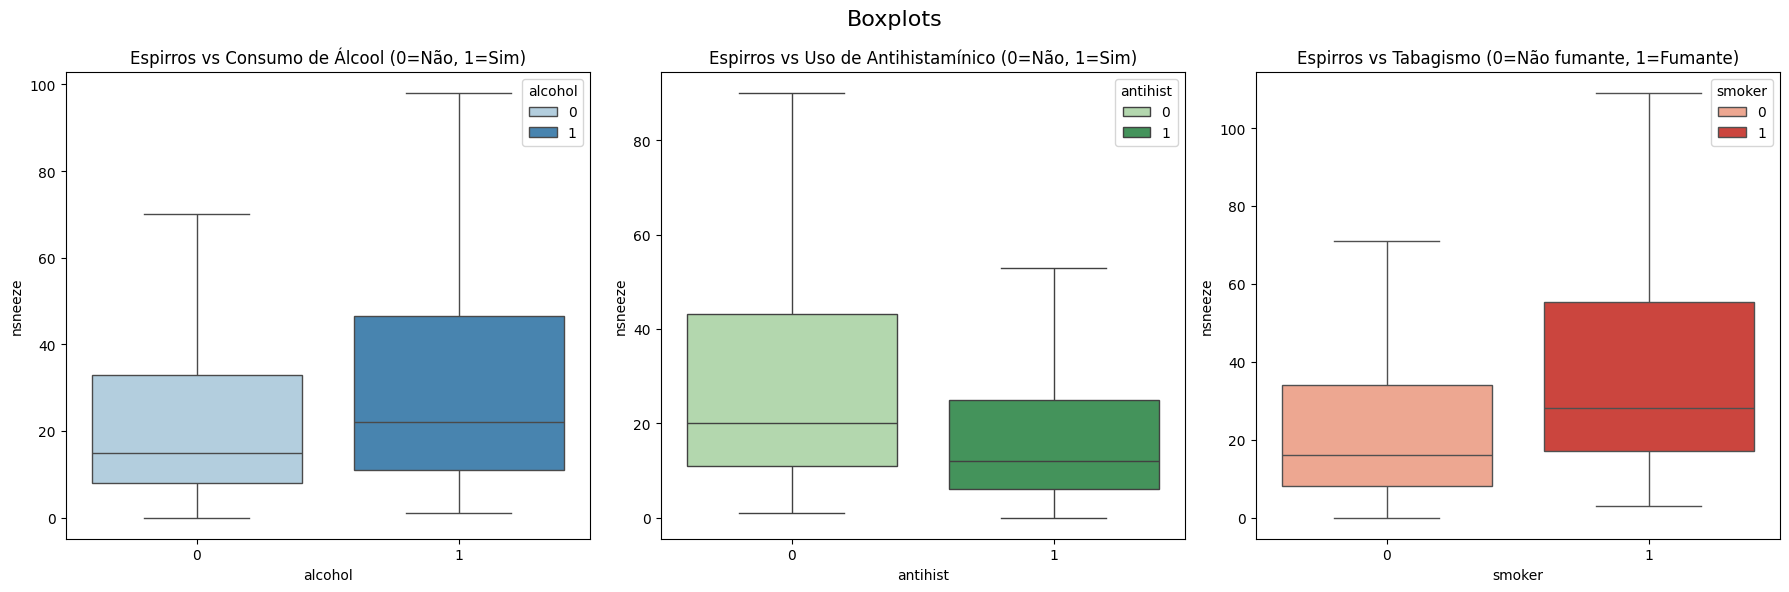

In [6]:
# Criamos 3 subplots pois temos 3 features categóricas 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Usamos cada subplot pra cada feature categórica e o showfliers=False para esconder os outliers.
sns.boxplot(x='alcohol', y='nsneeze', data=df, showfliers=False, ax=axes[0], hue='alcohol', palette='Blues')
axes[0].set_title('Espirros vs Consumo de Álcool (0=Não, 1=Sim)')

sns.boxplot(x='antihist', y='nsneeze', data=df, showfliers=False, ax=axes[1], hue='antihist', palette='Greens')
axes[1].set_title('Espirros vs Uso de Antihistamínico (0=Não, 1=Sim)')

sns.boxplot(x='smoker', y='nsneeze', data=df, showfliers=False, ax=axes[2], hue='smoker', palette='Reds')
axes[2].set_title('Espirros vs Tabagismo (0=Não fumante, 1=Fumante)')

plt.suptitle('Boxplots', fontsize=16)
plt.tight_layout()
plt.show()

### Com base nos boxplots, podemos inferir algumas coisas sobre as variáveis categóricas
* Pessoas que consumiram álcool tem uma mediana de espirros um pouco maior comparado a quem não consumiu.
* O uso de antihistamínico parece fazer efeito ao considerarmos que a mediana de espirros de quem usa é menor do que a de quem não usa, o que faz sentido ao considerar sua função.
* O fato de fumar ou não também gera uma diferença nas medianas, sendo que fumantes tem uma maior mediana que não fumantes.

### Agora partindo para as variáveis numéricas, vemos a distribuição espacial dos dados 

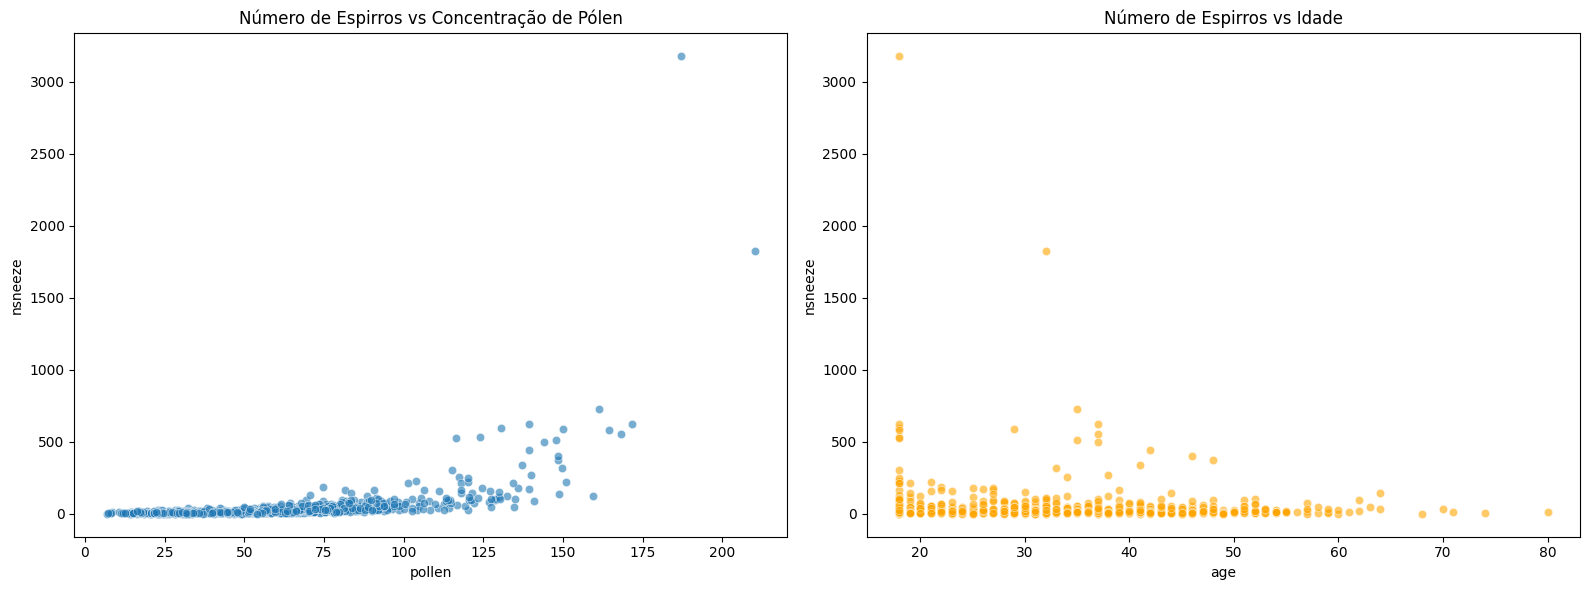

In [7]:
# Temos duas variáveis numéricas, portanto criamos dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Não precisamos tirar os outliers pois eles não atrapalharam na análise
sns.scatterplot(x='pollen', y='nsneeze', data=df, alpha=0.6, ax=axes[0])
axes[0].set_title('Número de Espirros vs Concentração de Pólen')

# Espirros vs Idade
sns.scatterplot(x='age', y='nsneeze', data=df, alpha=0.6, color='orange', ax=axes[1])
axes[1].set_title('Número de Espirros vs Idade')

plt.tight_layout()
plt.show()

### Com base nos gráficos, podemos inferir algumas coisas sobre as variáveis numéricas
* Podemos perceber uma relação positiva. Ao aumentarmos a concentração de pólen, o número de espirros tende a aumentar. A relação parece ser aproximadamente linear ou levemente exponencial.
* A idade não mostra um padrão muito claro visualmente, somente uma leve concentração nos primeiros anos de vida, o que nos sugere que a idade tem uma relação fraca com o número de espirros.

### Por fim, fazemos uma matriz de correlação para entendermos melhor a associação entre cada feature e a resposta. Isso é bom também para vermos se alguma feature tem multicolinearidade com outra, o que poderia prejudicar o modelo

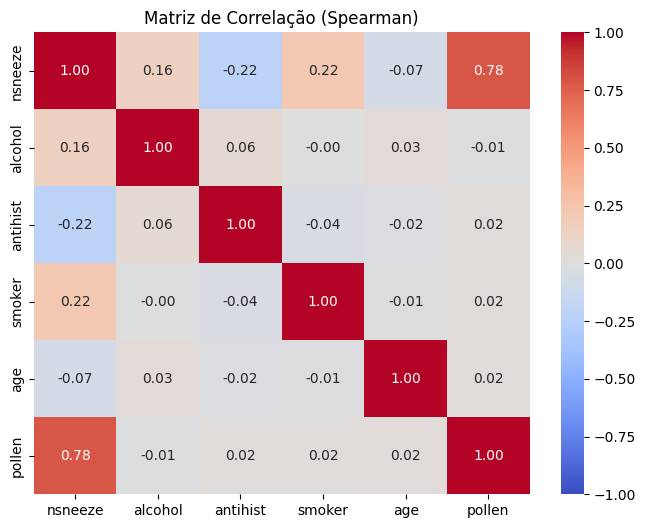

In [8]:
corr_matrix = df[['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen']].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de Correlação (Spearman)')
plt.show()

### Com base na matriz de correlação, temos alguns destaques:
* A feature pollen tem a correlação positiva mais forte com o número de espirros, confirmando nossa análise de que a concentração de pólen aumenta o número de espirros.
* A feature antihist tem uma correlação negativa, indicando que o uso do antihistamínico causa uma redução no número de espirros, conforme esperado.
* A feature alcohol também tem uma correlação positiva, sugerindo que o consumo de álcool pode estar associado a um número maior de espirros.
### Notamos também que as correlações entre as features são baixas, o que reduz a chance de termos problemas com multicolinearidade.

## **2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [9]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [10]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5243.5
Date:                Tue, 02 Dec 2025   Deviance:                       6416.9
Time:                        14:14:32   Pearson chi2:                 6.61e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5704      0.021  

### Com o summary() acima podemos obter os coeficientes obtidos pelo modelo e a significância estatística

#### Observando a coluna P>|z|, todas as variáveis tiveram valor de $0.000, o que siginifica que, a um nível de significância de 5% ou mesmo 1%, todos as features são estatisticamente significativas para explicar a variação no número de espirros.

#### Como o modelo de Poisson utiliza a função de ligação logarítmica, temos que pegar os coeficientes exponenciados ($e^\beta$) para ver o efeito percentual multiplicativo na média de espirros. Sobre os coeficientes, temos:

* Intercepto (1.5704): Valor base logarítmico quando todas as variáveis são zero. Neste caso seria um recém-nascido, sem exposição a pólen e sem fatores de risco
    * $\exp(1.5704) \approx 4.81$
    * Aproximadamente 4,8 espirros para esse perfil 

* Álcool (`C(alcohol)[T.1]`: 0.3477):
    * O coeficiente é positivo, o que nos mostra que o consumo de álcool aumenta o risco.
    * $\exp(0.3477) \approx 1.416 $.
    * O consumo de álcool aumenta em aproximadamente 41,6% no número esperado de espirros, ao mantermos as outras variáveis constantes.

* Antihistamínico (`C(antihist)[T.1]`: -0.5969):
    * O coeficiente é negativo, o que nos mostra que o uso de antihistamínico diminui o risco.
    * $\exp(-0.5969) \approx 0.550$.
    * O uso de antihistamínicos diminui o número esperado de espirros em quase **55%** do valor original (uma redução de aproximadamente 45%).

* Fumante (`C(smoker)[T.1]`: 0.6700):
    * O coeficiente é positivo e alto o que nos mostra que o tabagismo aumenta muito o risco.
    * $\exp(0.6700) \approx 1.954$.
    * Fumantes espirram, em média, **95,4%** mais do que não fumantes mantendo os demais fatores constantes, ou seja, quase duas vezes mais.

* Idade (`age`: -0.0127):
    * O coeficiente é negativo, o que nos mostra que o envelhecimento diminui o risco.
    * $\exp(-0.0127) \approx 0.987$.
    * Para cada ano a mais de idade, o número esperado de espirros diminui em aproximadamente **1,3%**.

* Pólen (`pollen`: 0.0301):
    * O coeficiente é positivo, o que nos mostra que a concentração de pólen aumenta o risco.
    * $\exp(0.0301) \approx 1.031$.
    * Para cada aumento unitário na concentração de pólen, o número esperado de espirros aumenta em **3,1%**.


## **3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


### A superdispersão ocorre quando a variância observada dos dados é maior do que a variância do modelo Poisson, quando média = variância. Se não for levada em conta, podemos ter erros padrão subestimados e p-valores falsamente significativos. Vamos verificar isso por dois métodos:
* Razão entre o Chi-Quadrado de Pearson e os graus de liberdade.
* Gráfico de envelope simulado.



### O parâmetro de dispersão (phi) é estimado dividindo o Chi-Quadrado de Pearson pelos graus de liberdade residuais, sendo que em um modelo Poisson ideal, esse valor deve ser próximo de 1.

In [11]:
df_resid = ajuste_pois.df_resid
phi_pearson = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid
print(f"Chi-quadrado de Pearson: {ajuste_pois.pearson_chi2:.4f}")
print(f"Graus de liberdade residuais: {ajuste_pois.df_resid}")
print(f"Estimativa de dispersão (phi): {phi_pearson:.4f}")

Chi-quadrado de Pearson: 6614.9103
Graus de liberdade residuais: 844
Estimativa de dispersão (phi): 7.8376


### Decidi calcular o phi de outra forma pois o valor que cheguei estava muito grande, então decide recalcular com base no deviance antes de tomar uma decisão

In [12]:
deviance = ajuste_pois.deviance
phi_deviance = deviance / df_resid
print(f"Deviance: {deviance:.2f}")
print(f"Razão: {phi_deviance:.2f}")


Deviance: 6416.86
Razão: 7.60


In [13]:
if phi_deviance > 1.5 and phi_pearson > 1.5:
    print("\nSuperdispersão")
    print(f"Ambos os métodos indicam valores muito acima de 1 (aprox {phi_deviance:.1f} e {phi_pearson:.1f}).")
    print("O modelo de Poisson não é adequado, pois subestima a variância dos dados.")
    print("Os erros-padrão atuais estão viesados para baixo (p-valores falsamente significativos).")
elif phi_deviance <= 1.2 and phi_pearson <= 1.2:
    print("\nModelo adequado")
    print("Os índices de dispersão estão próximos de 1. O modelo de Poisson é válido.")
else:
    print("\nResultados inconclusivos")
    print("Há dispersão moderada. Avalie outros diagnósticos.")


Superdispersão
Ambos os métodos indicam valores muito acima de 1 (aprox 7.6 e 7.8).
O modelo de Poisson não é adequado, pois subestima a variância dos dados.
Os erros-padrão atuais estão viesados para baixo (p-valores falsamente significativos).


### Mesmo com outra forma de calcular phi, obtivemos a mesma conclusão: o modelo está errado 

In [14]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

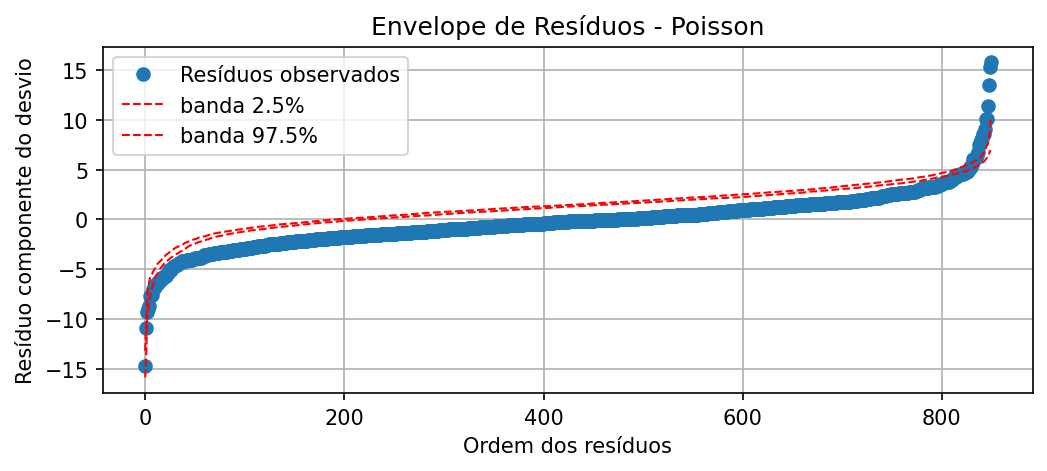

In [15]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

### Agora analisando o gráfico de envelope:

### Primeiro obtive um modelo Poisson ideal com diferentes bandas de confiança e depois plotei eles nas linhas tracejadas vermelhas. Se o modelo estivesse bem ajustado, a maioria dos resíduos observados(pontos azuis) estaria nessas bandas, o que não ocorre.

### A distribuição dos pontos fora das bandas de confiança é uma evidência visual de superdispersão. Portanto, essa análise confirma os testes numéricos: o modelo de Poisson não é adequado, pois ele falha ao não capturar a dispersão da variável resposta nsneeze.

## **4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

#alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2 --> meu caso é o sneeze5, portanto alpha fica 0.2 mesmo

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                  850
Model:                            GLM   Df Residuals:                      844
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3142.6
Date:                Tue, 02 Dec 2025   Deviance:                       777.09
Time:                        14:14:33   Pearson chi2:                     752.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9985
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4942      0.064  

### Após ajustarmos o modelo Binomial Negativo (com alpha=0.2), vamos comparar ele com o modelo de Poisson anterior com os base no critérios dados pelo enunciado: desvio(deviance), AIC e análise gráfica dos resíduos.

In [17]:
# Calculamos o desvio de cada modelo e depois a redução percentual do desvio ao passar do Poisson pra Binomial Negativo
dev_pois = ajuste_pois.deviance
dev_nb = ajuste_nb.deviance
reducao_dev = ((dev_pois - dev_nb) / dev_pois) * 100

print(f"Redução no desvio: {reducao_dev:.2f}%")


Redução no desvio: 87.89%


### Sabemos que o desvio mede o quanto o modelo está distante do modelo perfeito, e, portanto, queremos minimizar ele.

### Temos redução de 87,89% no desvio ao passar do modelo de Poisson para o Binomial Negativo, o que significa que grande maioria da variabilidade não explicada pelo modelo de Poisson foi resolvida ao adotarmos o modelo Binomial Negativo.

### Agora fazemos uma tabela comparativa entre as métricas mais comuns para compararmos os dois modelos 

In [18]:
# Criamos a tabela comparativa entre modelos com as métricas AIC e BIC  
metricas = pd.DataFrame({
    'Métrica': ['AIC', 'BIC'],
    'Poisson': [ 
        ajuste_pois.aic, 
        ajuste_pois.bic_llf
    ],
    'Binomial Negativo': [
        ajuste_nb.aic, 
        ajuste_nb.bic_llf
    ]
})

display(metricas)

,Métrica,Poisson,Binomial Negativo
0,AIC,10499.065632,6297.189432
1,BIC,10527.537050,6325.660850


### Ambas as métricas penalizam a complexidade do modelo, então, quanto menor, melhor para nós. Sabemos que o modelo Binomial Negativo é mais complexo por natureza, porém, mesmo com a penalidade por essa complexidade a mais, o AIC caiu quando passamos de Poisson para Binomial, o que nos mostra que o parâmetro alpha ajudou na modelagem.

### Agora partindo pra análise de resíduos componentes do desvio, temos o objetivo de ver se os resíduos do modelo Binomial Negativo são mais bem comportados que os do modelo Poisson.

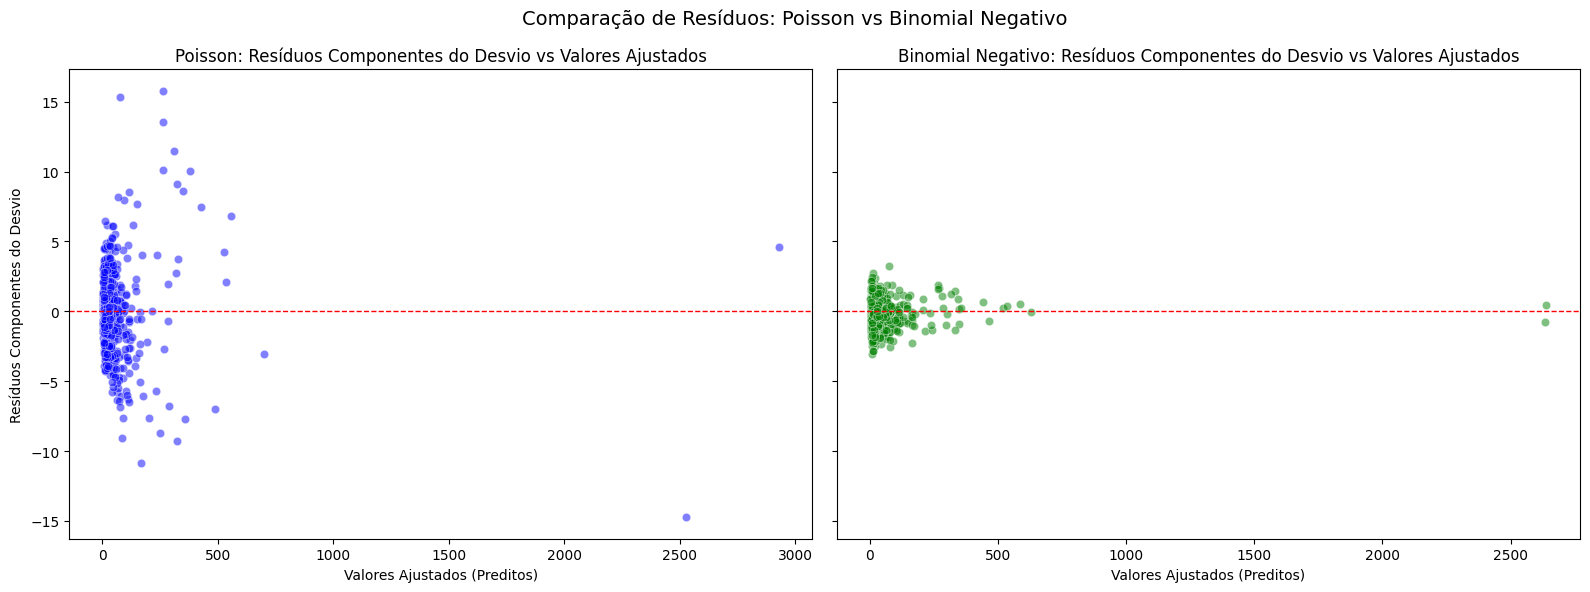

In [19]:
# Criamos dois subplots, um pra cada modelo
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# No primeiro gráfico, colocamos os resíduos componentes do desvio do Poisson
sns.scatterplot(x=ajuste_pois.fittedvalues, y=ajuste_pois.resid_deviance, ax=axes[0], alpha=0.5, color='blue')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Poisson: Resíduos Componentes do Desvio vs Valores Ajustados')
axes[0].set_xlabel('Valores Ajustados (Preditos)')
axes[0].set_ylabel('Resíduos Componentes do Desvio')

# Já no segundo gráfico, colocamos os resíduos componentes do desvio do Binomial Negativo
sns.scatterplot(x=ajuste_nb.fittedvalues, y=ajuste_nb.resid_deviance, ax=axes[1], alpha=0.5, color='green')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Binomial Negativo: Resíduos Componentes do Desvio vs Valores Ajustados')
axes[1].set_xlabel('Valores Ajustados (Preditos)')

plt.suptitle('Comparação de Resíduos: Poisson vs Binomial Negativo', fontsize=14)
plt.tight_layout()
plt.show()

### Mantemos uma mesma escala para os resíduos. Podemos notar que no modelo Poisson, os resíduos são bem maiores, o que nos indica erros grandes na predição. Já no Binomial Negativo, temos resíduos estejam mais concentrados próximos de zero 

### Além disso, o modelo Poisson tem uma dispersão aumentando com a média, enquanto o modelo Binomial Negativo atenua esse comportamento, tendo uma nuvem de pontos mais homogênea.

## **5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [20]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


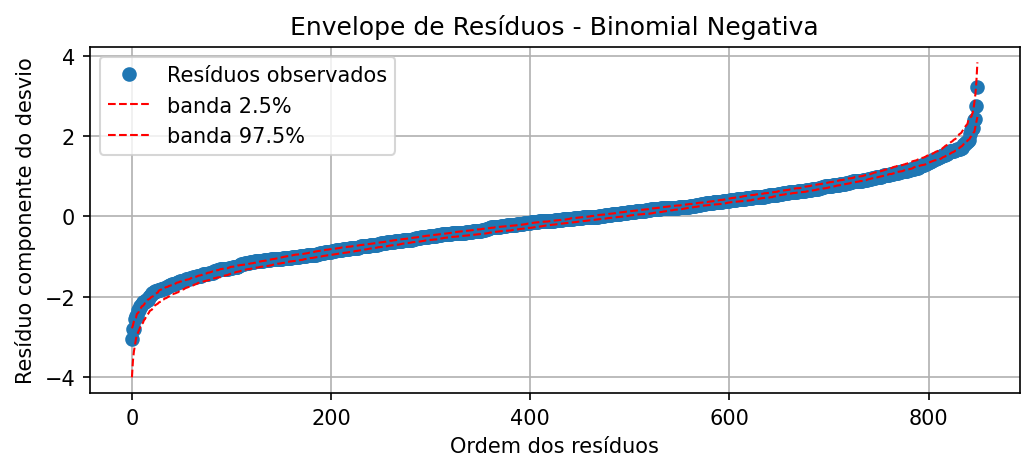

In [21]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

### Para o modelo Binomial Negativo, os coeficiente não representam diretamente o aumento na média da variável resposta, portanto, para interpretarmos o resultado em termos do número de espirros, calculamos o efeito médio marginal. No caso das variáveis binárias, isso seria a diferença no número de espirros ao mudar de 0 pra 1 mantendo as outras constantes.

In [22]:
# Calculamos os efeitos médios marginais --> o parâmetro dummy=True faz com que alcohol e antihist sejam tratados como mudanças discretas (0 -> 1).
margeff = ajuste_nb.get_margeff(at='overall', dummy=True)
print("Análise dos efeitos médios marginais")
print(margeff.summary())


# Criamos um dataframe para visualizar melhor
df_margeff = pd.DataFrame({
    'Variável': ajuste_nb.model.exog_names[1:], # Pulamos o intercepto pois ele não tem uma interpretação simples como no Poisson
    'Efeito Marginal (dy/dx)': margeff.margeff,
    'Erro Padrão': margeff.margeff_se,
    'P-valor': margeff.pvalues,
    'IC Inferior': margeff.conf_int()[:, 0],
    'IC Superior': margeff.conf_int()[:, 1]
})

# Filtramos apenas as variáveis de interesse
interesse = df_margeff[df_margeff['Variável'].isin(['C(alcohol)[T.1]', 'C(antihist)[T.1]'])]

display(interesse.round(2))

Análise dos efeitos médios marginais
         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]     17.1301      1.748      9.800      0.000      13.704      20.556
C(antihist)[T.1]   -22.4822      1.534    -14.657      0.000     -25.489     -19.476
C(smoker)[T.1]      29.2864      2.859     10.243      0.000      23.683      34.890
age                 -0.4507      0.071     -6.379      0.000      -0.589      -0.312
pollen               1.3398      0.065     20.585      0.000       1.212       1.467


,Variável,Efeito Marginal (dy/dx),Erro Padrão,P-valor,IC Inferior,IC Superior
0,C(alcohol)[T.1],17.13,1.75,0.0,13.70,20.56
1,C(antihist)[T.1],-22.48,1.53,0.0,-25.49,-19.48


### Como dito, os efeitos médios marginais nos dizem ,em média, em quanto o número de espirro é aumentado ou diminuido devido a cada fator. Com base na tabela gerada pelo modelo Binomial Negativo, observamos:

* Consumo de Álcool
  * Efeito de $+17.13$ espirros.

  * Intervalo de confiança a um nível de significânica de 95%: $[13.70, 20.56]$.

  * Portanto, concluimos que o consumo de álcool é muito importante para a nossa previsão. Em média, indivíduos que consumiram álcool tem um aumento de aproximadamente 17 espirros em um dia em comparação aos que não consumiram, se mantivermos as outras características constantes. O intervalo de confiança nos dá certeza à 95% de que esse aumento está entre 13 e 20 espirros.

* Uso de Anti-histamínico (antihist)

  * Efeito de $-22.48$ espirros.

  * Intervalo de confiança a um nível de significânica de 95%: $[-25.49, -19.48]$.

  * Portanto, o medicamento é muito eficiente, de forma que o uso de anti-histamínicos causa uma redução média de aproximadamente 22 espirros por dia.

## **6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



### Primeiro fazemos a divisão dos conjuntos de treino e teste, seguindo o enunciado e colocando um random_state para garantir reprodutibilidade

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, df['nsneeze'], test_size=0.20, random_state=42)
# Printamos o tamanho dos conjuntos pra ver se deu certo a divisão dos dados
print(f"Total de observações: {len(df)}")
print(f"Treinamento: {len(X_train)}")
print(f"Teste: {len(X_test)}")

Total de observações: 850
Treinamento: 680
Teste: 170


### Depois de dividir os conjuntos, treinamos os dois modelos sendo que nsneeze é a resposta e o resto das variáveis são preditoras

In [24]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Ajuste do modelo Poisson
model_pois_train = smf.glm(formula=formula, data=X_train, family=sm.families.Poisson()).fit()

# Ajuste do modelo Binomial Negativo 
# Mantemos o alpha=0.2 conforme usado na parte 4
model_nb_train = smf.glm(formula=formula, data=X_train, family=sm.families.NegativeBinomial(alpha=0.2)).fit()


### Agora fazemos a previsão dos dados de teste e calculamos as métricas de erro

In [25]:
pred_pois = model_pois_train.predict(X_test)
pred_nb = model_nb_train.predict(X_test)

# Calculamos as métricas de erro, neste caso, escolhi o erro médio quadrático e o erro médio absoluto, para ambos os modelos, ao comparar o valor predito com o valor real (y_test)
metrics = pd.DataFrame({
    'Métrica': ['Erro Quadrático Médio', 'Erro Absoluto Médio'],
    'Poisson': [
        mean_squared_error(y_test, pred_pois),
        mean_absolute_error(y_test, pred_pois)
    ],
    'Binomial Negativo': [
        mean_squared_error(y_test, pred_nb),
        mean_absolute_error(y_test, pred_nb)
    ]
})

print("Desempenho na predição do conjunto de teste")
display(metrics)

# Fazemos uma verificação visual das primeiras 30 previsões
comparativo = pd.DataFrame({
    'Real': y_test.head(30).values,
    'Pred_Poisson': pred_pois.head(30).values,
    'Pred_NB': pred_nb.head(30).values
})
print("\nExemplo de Previsões")
print(comparativo)

Desempenho na predição do conjunto de teste


,Métrica,Poisson,Binomial Negativo
0,Erro Quadrático Médio,9617.626390,6439.146831
1,Erro Absoluto Médio,19.488604,17.123757



Exemplo de Previsões
    Real  Pred_Poisson     Pred_NB
0     12     12.030023   12.345406
1     17     15.091357   14.986703
2     13     12.014220   11.768724
3      7      5.113030    5.611925
4     37     52.511426   54.008728
5     43     28.361468   29.487682
6     24     27.886310   27.991828
7    620    734.794389  649.110332
8      5      6.981274    7.545783
9     10     17.227546   17.797367
10    56     38.072364   37.904896
11     5      8.921773    9.392841
12    15     20.671102   20.900515
13    25     19.842894   19.389762
14    36     74.494840   77.426787
15     5      9.762742   10.274067
16    11     10.511086   11.259585
17     8     14.216777   13.864784
18     9     14.225114   14.929206
19     7      8.041888    8.832026
20     4      7.067348    7.132889
21    21     21.547816   20.959817
22    20     18.825363   20.579234
23    85    115.064111  112.451971
24    85    109.444645  107.681604
25    23     34.215395   33.368121
26   181    316.319979  307.57401

### Os resultados obtidos no conjunto de teste nos mostram que o modelo Binomial Negativo consegue explicar melhor os dados. Ao comparar as métricas de erro obtemos:

* Erro Quadrático Médio:

  * Poisson: 9617.63

  * Binomial Negativo: 6439.15

  * O modelo Poisson tem um erro quadrático médio cerca de 49% maior que o do Binomial Negativo. Como o EQM penaliza erros grandes ao quadrado, essa grande diferença sugere que o modelo de Poisson comete erros maiores ao tentar prever contagens mais altas, enquanto o Binomial Negativo se ajusta muito melhor a esses casos.

* Erro Absoluto Médio:

  * Poisson: 19.49

  * Binomial Negativo: 17.12

  * O modelo Binomial Negativo erra, em média, cerca de 2.3 espirros a menos por indivíduo do que as do modelo Poisson.

### Qual modelo apresenta melhor desempenho?
* Acredito que modelo Binomial Negativo tenha apresentado o melhor desempenho para prever novos dados, uma vez que teve um menor erro médio absoluto, ou seja, acertando mais na média e é muito mais seguro para prever casos de alta contagem.

### Coincidência com Critérios de Ajuste
* As conclusões baseadas na predição coincidem com as baseadas no ajuste:

  * Como vimos anteriormente, o desvio e o AIC indicaram que o modelo de Poisson não conseguia capturar a variabilidade dos dados, indicada pela superdispersão.

  * Agora, as métricas da predição confirmam o problema, tendo previsões piores. Como o modelo Binomial Negativo tem o parâmetro de dispersão, ele consegue generalizar melhor para casos comuns e para casos extremos.

### Ou seja, o modelo Binomial Negativo é o melhor modelo para descrever e prever o número de espirros.

## **7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

### Por fim, faremos a previsão do número de espirros para dois perfis diferentes utilizando o modelo Binomial Negativo. Porém, antes da predição, vamos entender melhor os perfis:

* **Indivíduo A:** Não bebe, não fuma, toma remédio em um dia de baixo pólen --> número muito baixo de espirros.
* **Indivíduo B:** Bebe, fuma, não toma remédio em um dia de alto pólen --> número elevado de espirros.

In [26]:
# Como não foi dado um número de nível de pólen, vamos definir ele com base nos quartis dos dados:

# Valor baixo --> primeiro quartil
# Valor alto --> terceiro quartil
pollen_baixo = df['pollen'].quantile(0.25)
pollen_alto = df['pollen'].quantile(0.75)

print(f"Pólen Baixo: {pollen_baixo:.2f}")
print(f"Pólen Alto: {pollen_alto:.2f}")

# Criamos um dataframe com os perfis A e B
perfis = pd.DataFrame({
    'Perfil': ['Indivíduo A', 'Indivíduo B'],
    'alcohol': [0, 1],      
    'antihist': [1, 0],      
    'smoker': [0, 1],        
    'age': [30, 50],        
    'pollen': [pollen_baixo, pollen_alto]
})

# Geramos as previsões do número esperado de espirros com o modelo Binomial Negativo ajustado anteriormente 
previsoes = model_nb_train.predict(perfis)

perfis['Previsão (Espirros)'] = previsoes

print("\nPrevisões do Modelo Binomial Negativo")
display(perfis)

Pólen Baixo: 36.91
Pólen Alto: 76.15

Previsões do Modelo Binomial Negativo


,Perfil,alcohol,antihist,smoker,age,pollen,Previsão (Espirros)
0,Indivíduo A,0,1,0,30,36.913786,5.660344
1,Indivíduo B,1,0,1,50,76.149298,66.452231


### Indivíduo A:

* Número esperado de espirros: 5.66.

*  O indivíduo A faz o uso de medicação e não possui os hábitos de risco, além estar em um ambiente com pouco pólen (favorável). O nosso modelo prevê um número bem baixo de espirros.

### Indivíduo B:

* Número esperado de espirros: 66.45

* O indivíduo B combina todos os fatores de risco, não usa a medicação e está em um ambiente com alta concentração de pólen, o que muito provavelmente gerará uma crise de espirros. O número esperado de espirros é mais de 12 vezes maior do que o do Indivíduo A.